<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH3/SSD_Tensroflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorflow, Keras DownGrade

In [ ]:
! pip install tensorflow==1.13.1
! pip install keras==2.2.1

import tensorflow as tf
import keras 

In [8]:
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.1


## Git Clone

In [ ]:
! git clone http://github.com/chulminkw/DLCV

## Library Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2
import time

## Change Home directory for download

In [4]:
os.mkdir('/content/DLCV/SSD')
os.chdir('/content/DLCV/SSD')
os.getcwd()

'/content/DLCV/SSD'

##Pretrained_Model Download

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt


In [6]:
!tar -xvf ssd_inception*.gz #tar.gz file 해제
! rm *.gz #zip file remove
! mv /content/DLCV/SSD/ssd_inception*.pbtxt  /content/DLCV/SSD/ssd_inception_v2_coco_2017_11_17/graph.pbtxt #move pbtxt file
os.listdir('/content/DLCV/SSD/ssd_inception_v2_coco_2017_11_17') #directory 확인

ssd_inception_v2_coco_2017_11_17/
ssd_inception_v2_coco_2017_11_17/model.ckpt.index
ssd_inception_v2_coco_2017_11_17/model.ckpt.meta
ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb
ssd_inception_v2_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2017_11_17/saved_model/
ssd_inception_v2_coco_2017_11_17/saved_model/saved_model.pb
ssd_inception_v2_coco_2017_11_17/saved_model/variables/
ssd_inception_v2_coco_2017_11_17/checkpoint


['model.ckpt.data-00000-of-00001',
 'saved_model',
 'model.ckpt.index',
 'frozen_inference_graph.pb',
 'checkpoint',
 'model.ckpt.meta',
 'graph.pbtxt']

## Label Mapping

In [7]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


##Object_Detection

person: 0.9696
person: 0.9660
person: 0.8916
car: 0.8609
car: 0.7223
car: 0.7184
car: 0.7095
person: 0.6298
car: 0.5949
car: 0.5511
running_time: 7.3777


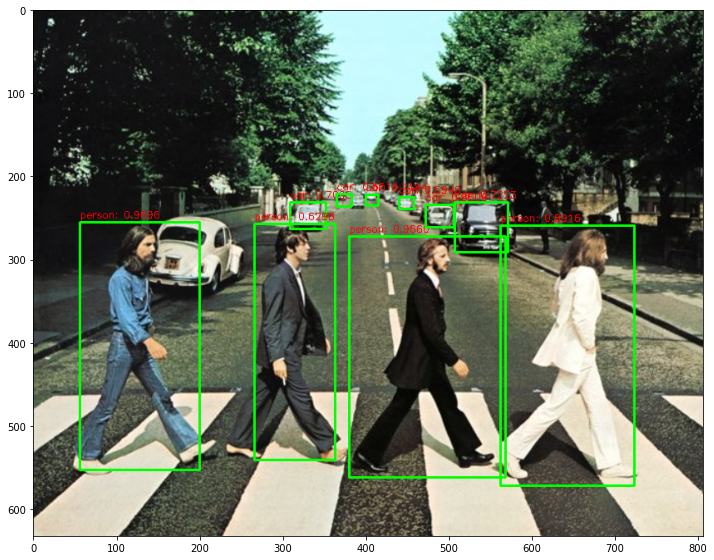

In [13]:
model_path = '/content/DLCV/SSD/ssd_inception_v2_coco_2017_11_17/'
img_path = '/content/DLCV/data/image/beatles01.jpg'

with tf.gfile.FastGFile(model_path+'frozen_inference_graph.pb','rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    img = cv2.imread(img_path)
    draw_img = img.copy()
    row = img.shape[0]
    col = img.shape[1]
    inp = cv2.resize(img,(300,300))
    inp = inp[:,:,[2,1,0]] ##BGR2RGB

    start = time.time()

    out=sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                  sess.graph.get_tensor_by_name('detection_scores:0'),
                  sess.graph.get_tensor_by_name('detection_boxes:0'),
                  sess.graph.get_tensor_by_name('detection_classes:0')],
                 feed_dict={'image_tensor:0': inp.reshape(1,inp.shape[0],inp.shape[1],3)})
    
    green=(0,255,0)
    red=(0,0,255)

    num_detection = int(out[0][0])

    for i in range(num_detection):
        classid = int(out[3][0][i])
        score = float(out[1][0][i])

        bbox = [float(v) for v in out[2][0][i]]

        if score>0.4:

            left = int(bbox[1]* col) 
            top  = int(bbox[0]* row) 
            right = int(bbox[3]* col)
            bottom = int(bbox[2]* row) 

            caption = '{}: {:.4f}'.format(labels_to_names[classid],score)
            print(caption)
            cv2.rectangle(draw_img, (left,top), (right, bottom), color=green, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

    print('running_time: {:.4f}'.format(time.time()-start))

rgb_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(rgb_img)
plt.show()


- SSD model 은 CPU 환경에서 최적화 되어있다.